In [188]:
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn import datasets
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

In [117]:
%matplotlib inline

In [358]:
iris=datasets.load_iris()
iris_x=pd.DataFrame(iris['data'],columns=iris['feature_names'])
iris_y=pd.DataFrame(iris['target'],columns=['target'])
iris_data=pd.concat([iris_x,iris_y],axis=1)
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [359]:
iris_target_name=pd.DataFrame(iris['target_names'],columns=['target_names'])
iris_target_name

,target_names
0,setosa
1,versicolor
2,virginica


In [360]:
iris_data=iris_data[(iris_data['target']==0)|(iris_data['target']==1)]
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [361]:
iy=iris_data[['target']]
iy.shape

(100, 1)

In [362]:
ix=iris_data[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]

In [363]:
ix.shape

(100, 4)

In [364]:
ix.insert(0,'x_zero',1.0)


In [365]:
ix.head(3)

,x_zero,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,1.0,5.1,3.5,1.4,0.2
1,1.0,4.9,3.0,1.4,0.2
2,1.0,4.7,3.2,1.3,0.2


In [366]:
x_train,x_test,y_train,y_test=train_test_split(ix,iy, random_state=0)

In [193]:
def sigmoid(z):
    return 1.0/(1+np.exp(-z))

In [194]:
def cost(x,y,theta):
    m=x.shape[0]
    h=sigmoid(np.dot(x,theta))
    total_cost=(np.dot(-y.T,np.log(h))-np.dot((1-y.T),np.log(1-h)))/m
    return total_cost        

In [195]:
def gradient(x,theta,y,alpha):
    m=x.shape[0]
    h=sigmoid(np.dot(x,theta))
    grad=np.dot(x.T,(h-y))/m
    theta=theta-alpha*grad
    return theta

In [367]:
iteration=500
learning_rate=0.5
theta=np.zeros(ix.shape[1]).reshape([5,1])
converges=[]

for i in range(iteration):
    current_cost=cost(ix,iy,theta)
    #print(current_cost)
    theta=gradient(x_train,theta,y_train,learning_rate)
    #print(theta)
    if i%10 ==0:
        converges.append(float(current_cost))

In [374]:
correct=0
error=0
for i in range(x_test.shape[0]):
    pred=sigmoid(np.dot(x_test.iloc[i:i+1,:],theta))
    
    if pred >=0.5:
        if (y[i] == 1)==True:
            correct+=1
        else:
            error+=1
    if pred <0.5:
        if (y[i] == 0)==True:
            correct+=1
        else:
            error+=1
    

    

In [245]:
correct

25

In [246]:
error

0

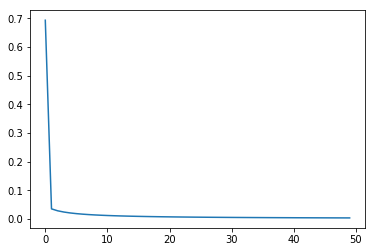

In [375]:
plt.plot(converges)
plt.show()

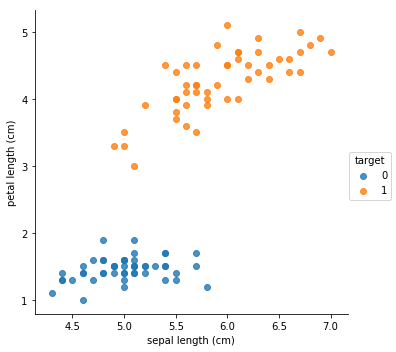

In [377]:
sns.lmplot('sepal length (cm)','petal length (cm)',data=iris_data,fit_reg=False,hue='target')